In [5]:
import matplotlib.pyplot as plt 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [7]:
model = Sequential()
model.add(Dense(20, input_dim = 2, activation = 'sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy')   #binary_crossentropy二分损失函数 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


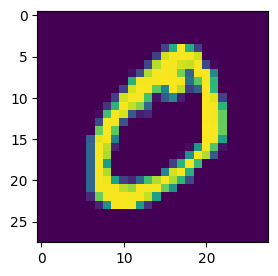

In [12]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
img1 = x_train[1]
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)